<a href="https://colab.research.google.com/github/Wesnahika/Medical-Decision-Tree-Project/blob/main/Copy_of_Medical_Decision_Tree_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Decision Tree Exploratory Data Analyis in Python

## Importing data and libraries

In the beginning of this mini project we will import the dataset via github as well as various python libraries in order to start our exploratory data analysis

In [1]:
import math
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import tree
import graphviz
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
Medical = pd.read_csv('https://raw.githubusercontent.com/Wesnahika/Medical-Decision-Tree-Project/main/drug200.csv')
Medical.info()
Medical.to_csv('Medical.csv')

print("unique drug names", Medical['Drug'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
unique drug names ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [3]:
((100 * (Medical.isna().sum(axis = 1) / Medical.shape[1]).round(2)) > 0).sum()

0

In [4]:
((100 * (Medical.isna().sum() / Medical.shape[1]).round(2)) > 0).sum()

0

## Encode and change to dummy variables

In [5]:
Medical_2 = Medical.copy()

In [6]:
Medical_dummy = pd.get_dummies(data = Medical_2[['Sex', 'BP', 'Cholesterol']], drop_first= True)
Medical_dummy.head()

,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,0,0,0,0
1,1,1,0,0
2,1,1,0,0
3,0,0,1,0
4,0,1,0,0


Then here we bring both datasets to get to form the fully encoded dataset

In [7]:
Medical_2 = Medical_2.drop(['Sex', 'BP', 'Cholesterol'], axis = 1)
Medical_2= pd.concat([Medical_2, Medical_dummy], axis = 1)
Medical_2.head()

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,drugY,0,0,0,0
1,47,13.093,drugC,1,1,0,0
2,47,10.114,drugC,1,1,0,0
3,28,7.798,drugX,0,0,1,0
4,61,18.043,drugY,0,1,0,0


In [8]:
numeric_col = ['Age', 'Na_to_K']
catagorical_col = ['Sex', 'BP', 'Cholesterol']

## Visualizations

Here we begin to visualize the feature values for each drug

In [9]:
Medical_2[Medical_2.Drug == 'drugY'].head(3)

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,drugY,0,0,0,0
4,61,18.043,drugY,0,1,0,0
6,49,16.275,drugY,0,0,1,0


In [10]:
Medical_2[Medical_2.Drug == 'drugC'].head(3)

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
1,47,13.093,drugC,1,1,0,0
2,47,10.114,drugC,1,1,0,0
7,41,11.037,drugC,1,1,0,0


In [11]:
Medical_2[Medical_2.Drug == 'drugX'].head(3)

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
3,28,7.798,drugX,0,0,1,0
5,22,8.607,drugX,0,0,1,0
14,50,12.703,drugX,0,0,1,0


In [12]:
Medical_2[Medical_2.Drug == 'drugA'].head(3)

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
17,43,13.972,drugA,1,0,0,0
36,32,9.445,drugA,1,0,0,1
46,37,13.091,drugA,0,0,0,0


In [13]:
Medical_2[Medical_2.Drug == 'drugB'].head(3)

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
31,74,9.567,drugB,1,0,0,0
41,58,14.239,drugB,0,0,0,1
54,68,10.189,drugB,0,0,0,1


In [14]:
Medical_2.dtypes

Age                     int64
Na_to_K               float64
Drug                   object
Sex_M                   uint8
BP_LOW                  uint8
BP_NORMAL               uint8
Cholesterol_NORMAL      uint8
dtype: object

In [15]:
Medical_2.shape

(200, 7)

In [16]:
Medical_2.head

<bound method NDFrame.head of      Age  Na_to_K   Drug  Sex_M  BP_LOW  BP_NORMAL  Cholesterol_NORMAL
0     23   25.355  drugY      0       0          0                   0
1     47   13.093  drugC      1       1          0                   0
2     47   10.114  drugC      1       1          0                   0
3     28    7.798  drugX      0       0          1                   0
4     61   18.043  drugY      0       1          0                   0
..   ...      ...    ...    ...     ...        ...                 ...
195   56   11.567  drugC      0       1          0                   0
196   16   12.006  drugC      1       1          0                   0
197   52    9.894  drugX      1       0          1                   0
198   23   14.020  drugX      1       0          1                   1
199   40   11.349  drugX      0       1          0                   1

[200 rows x 7 columns]>

In [17]:
Medical_2.describe()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,16.084485,0.520000,0.320000,0.295000,0.485000
std,16.544315,7.223956,0.500854,0.467647,0.457187,0.501029
min,15.000000,6.269000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,10.445500,0.000000,0.000000,0.000000,0.000000
50%,45.000000,13.936500,1.000000,0.000000,0.000000,0.000000
75%,58.000000,19.380000,1.000000,1.000000,1.000000,1.000000
max,74.000000,38.247000,1.000000,1.000000,1.000000,1.000000


Here we will begin to visualize each of the variables in order to detect any patterns or properties. In this section we will begin with simple countplots or histograms of each of the variables.

### Histograms

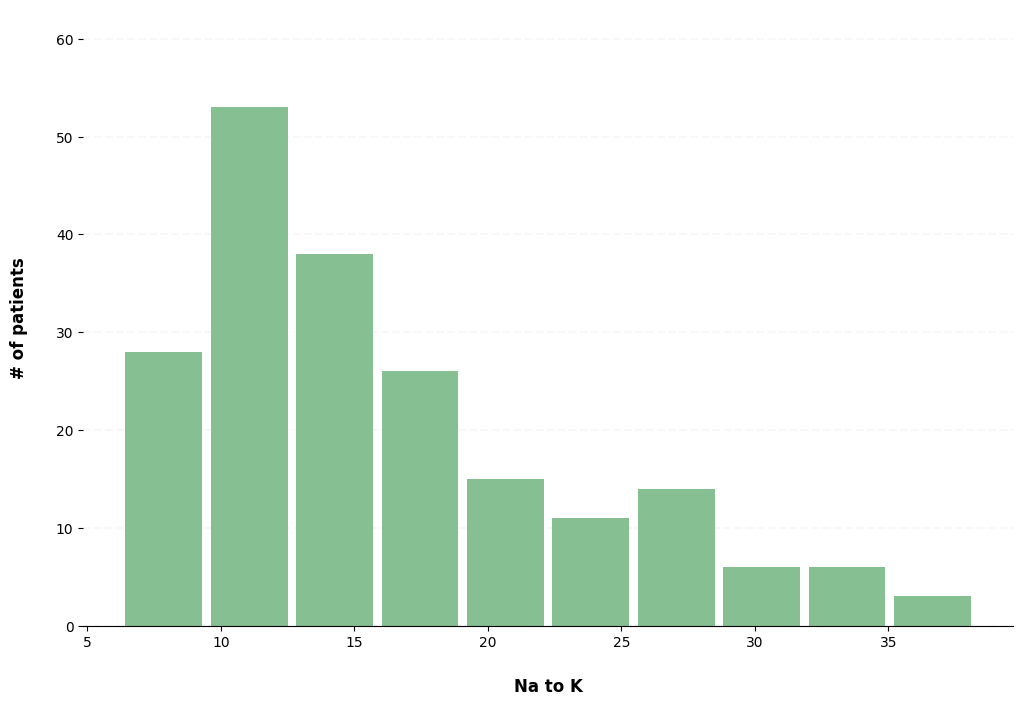

In [18]:
nk = Medical_2.hist(column='Na_to_K', grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

nk = nk[0]
for k in nk:

    # Despine
    k.spines['right'].set_visible(False)
    k.spines['top'].set_visible(False)
    k.spines['left'].set_visible(False)


    # Draw horizontal axis lines
    vals = k.get_yticks()
    for tick in vals:
        k.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    k.set_title("")

    # Set x-axis label
    k.set_xlabel("Na to K", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    k.set_ylabel("# of patients", labelpad=20, weight='bold', size=12)



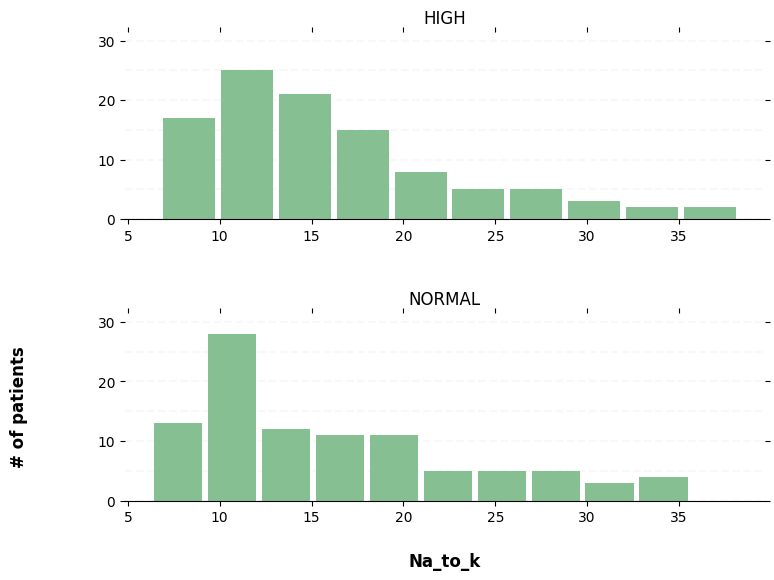

In [20]:
nk = Medical.hist(column='Na_to_K', by=Medical.Cholesterol, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

for i,k in enumerate(nk):

    # Despine
    k.spines['right'].set_visible(False)
    k.spines['top'].set_visible(False)
    k.spines['left'].set_visible(False)

    # Switch off ticks
    k.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = k.get_yticks()
    for tick in vals:
        k.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    k.set_xlabel("Na_to_k", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    if i == 1:
        k.set_ylabel("# of patients", labelpad=50, weight='bold', size=12)


    k.tick_params(axis='x', rotation=0)

Here is the Na to K histogram based off of the level of cholesterol the patient has with 0 equating to High and 1 to normal

### Countplots

<Axes: xlabel='Drug', ylabel='count'>

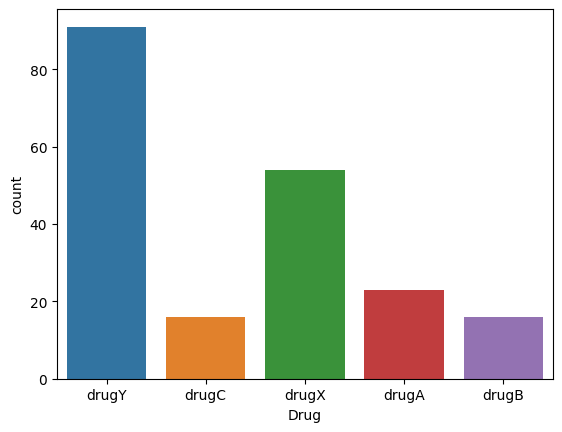

In [21]:
sns.countplot(x = "Drug", data = Medical_2)


<Axes: xlabel='Sex', ylabel='count'>

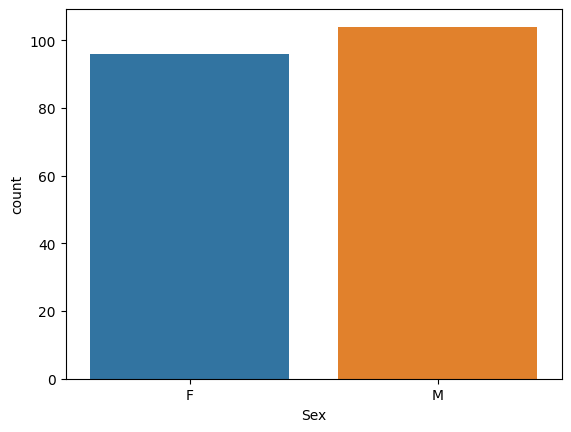

In [26]:
sns.countplot(x = "Sex", data = Medical)

<Axes: xlabel='BP', ylabel='count'>

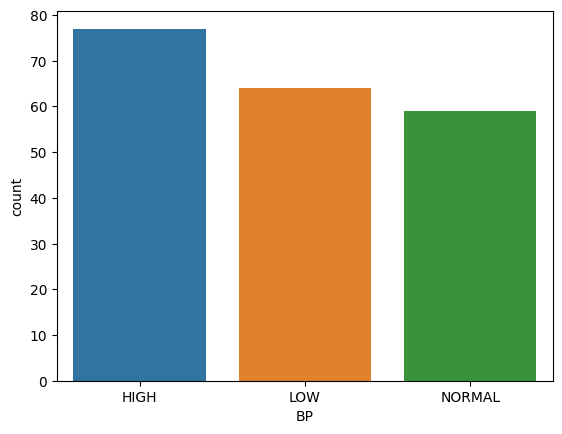

In [27]:
sns.countplot(x = "BP", data = Medical)

<Axes: xlabel='Cholesterol', ylabel='count'>

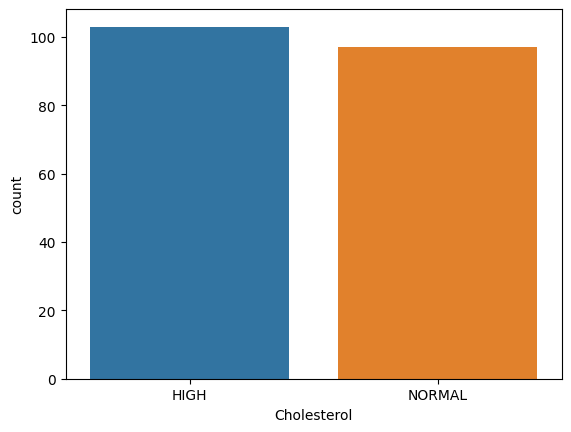

In [28]:
sns.countplot(x = "Cholesterol", data = Medical)

### Scatterplots

<Axes: ylabel='Age'>

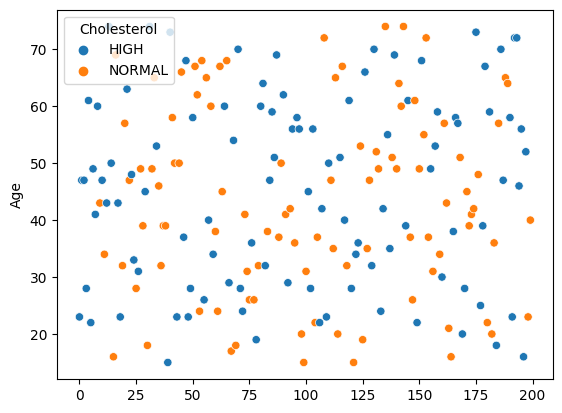

In [22]:
sns.scatterplot(x = Medical.index, y= Medical_2['Age'], hue = Medical['Cholesterol'])


For this first graph I wanted to see if there is a relationship between age and the cholesterol of the patient, however as we can see, there is no real visible relation between the two variables.

<Axes: ylabel='Age'>

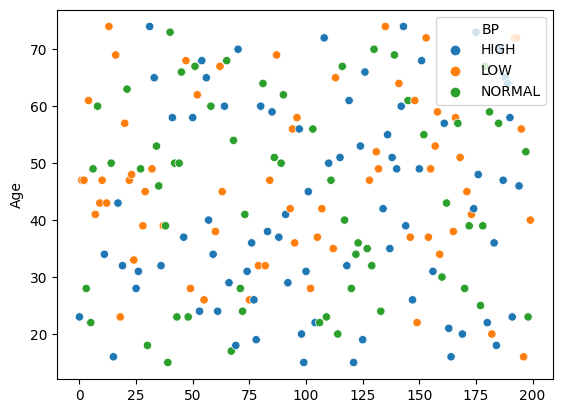

In [23]:
sns.scatterplot(x = Medical.index, y= Medical['Age'], hue = Medical['BP'])


Here we tried a similar approach to comparing age and blood pressure and once again, there wasn't a clear visual correlation towards the two when it comes to this specific dataset

<Axes: ylabel='Age'>

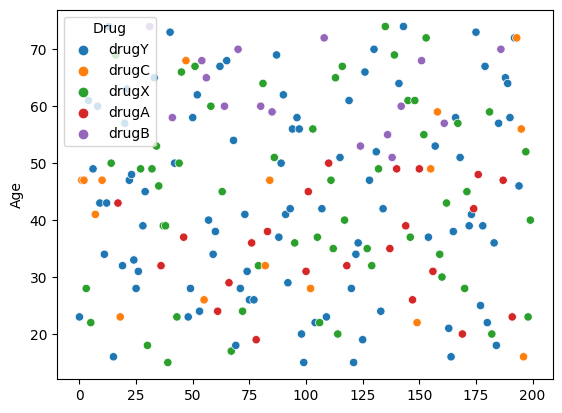

In [24]:
sns.scatterplot(x = Medical.index, y= Medical['Age'], hue = Medical['Drug'])

In this chart we notice that only certain drugs are administered to certain age groups such as drug 'B' mainly being given to those over the age of 50 years old and drug 'A' being given to those who are under 50.

<Axes: ylabel='Na_to_K'>

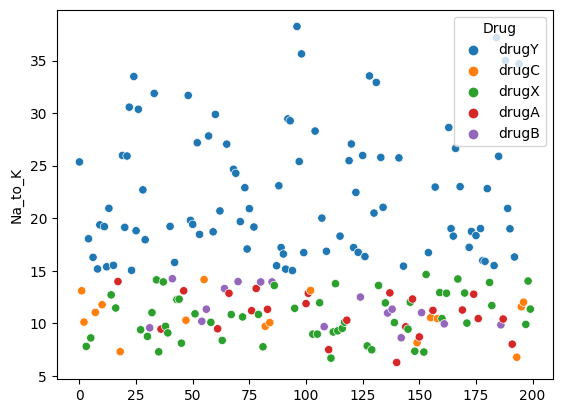

In [25]:
sns.scatterplot(x = Medical.index, y= Medical['Na_to_K'], hue = Medical['Drug'])

When looking at the Sodium-Potassium variable we notice that drugY is admistered towards those who have an Na to K above 15

<Axes: xlabel='Age', ylabel='Na_to_K'>

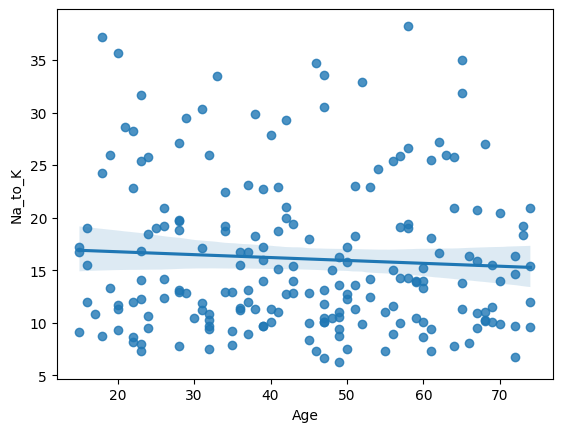

In [ ]:
sns.regplot( x = 'Age', y = 'Na_to_K', data = Medical)

In this graph I try to look for a correlation between the Sodium-Potasium variable and age, one thing that is to be noticed is that the Sodium-Potasium rarely exceeds 20 and is sparse passed that point.

## Decision Tree

In order to create the model we must first create a feature matrix showing the X and Y labels

In [29]:
X = Medical_2.drop('Drug', axis = 1)
y = Medical_2.Drug

print('X shape', X.shape)
print('Y shape', y.shape)

X shape (200, 6)
Y shape (200,)


Then I will split the data set so that we can have separate training and testing sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1) #20% for testing and 80% for training

print('x_train shape', X_train.shape)
print('x_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)


x_train shape (160, 6)
x_test shape (40, 6)
y_train shape (160,)
y_test shape (40,)


Now we begin to train using the Decison tree

In [31]:
scaler = MinMaxScaler()
X_train[numeric_col] = scaler.fit_transform(X_train[numeric_col])
X_test[numeric_col] = scaler.transform(X_test[numeric_col])

In [32]:
Tree = DecisionTreeClassifier()
Tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
y_train_pr = Tree.predict(X_train)
print("Accuracy for training", accuracy_score(y_pred= y_train_pr, y_true = y_train))

Accuracy for training 1.0


In [34]:
y_test_pr = Tree.predict(X_test)
print("Accuracy for test", accuracy_score(y_pred= y_test_pr, y_true = y_test))

Accuracy for test 0.975


In [37]:
text_representation = tree.export_text(Tree)
print(text_representation)

|--- feature_1 <= 0.27
|   |--- feature_4 <= 0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_0 <= 0.59
|   |   |   |   |--- class: drugA
|   |   |   |--- feature_0 >  0.59
|   |   |   |   |--- class: drugB
|   |   |--- feature_3 >  0.50
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- class: drugC
|   |   |   |--- feature_5 >  0.50
|   |   |   |   |--- class: drugX
|   |--- feature_4 >  0.50
|   |   |--- class: drugX
|--- feature_1 >  0.27
|   |--- class: drugY



## Confusion matrix

In [38]:
confusion_matrix(y_test, y_test_pr)

array([[ 3,  1,  0,  0,  0],
       [ 0,  2,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 13,  0],
       [ 0,  0,  0,  0, 17]])

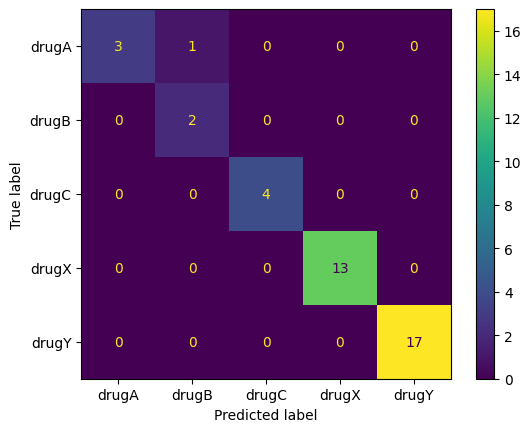

In [39]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pr)

## Image

In [35]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [36]:
dot_data = StringIO()
filename = "medicaltree.png"
featureNames = Medical_2.columns[0:6]
targetNames = Medical_2["Drug"].unique().tolist()
out=tree.export_graphviz(Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')